### Assignment #1
- Use the daily bike data set-day.csv. (https://archive.ics.uci.edu/ml/machinelearning-databases/00275/)
- Build a linear regression model using your inputs (normalized temperature
(atemp), humidity and windspeed) and output is the “cnt”.
- Compare your results with that of the closed form.
- Plot your cost function with the number of iterations.
Hint: Normalize your data to speed your convergence

In [25]:
#Importing the required libiraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
%matplotlib inline
from matplotlib import style
#reading the Dataset
df = pd.read_csv('bike_sharing_daily.csv')
#Slicing the DataFrame
df = df[['atemp','hum','windspeed', 'cnt']]
#Generating a list for looping
colnames = list(df.columns)
colnames.remove('cnt')


In [37]:
#The relation of every feature with the 'cnt'
def featuresgraph(col_list, title):
    plt.figure(figsize=(12,14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(2,2,i)
        plt.plot(df[col], df['cnt'], marker='.', linestyle='none' )
        plt.xlabel('Count', fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.title(title % (col) , fontsize = 16)

3


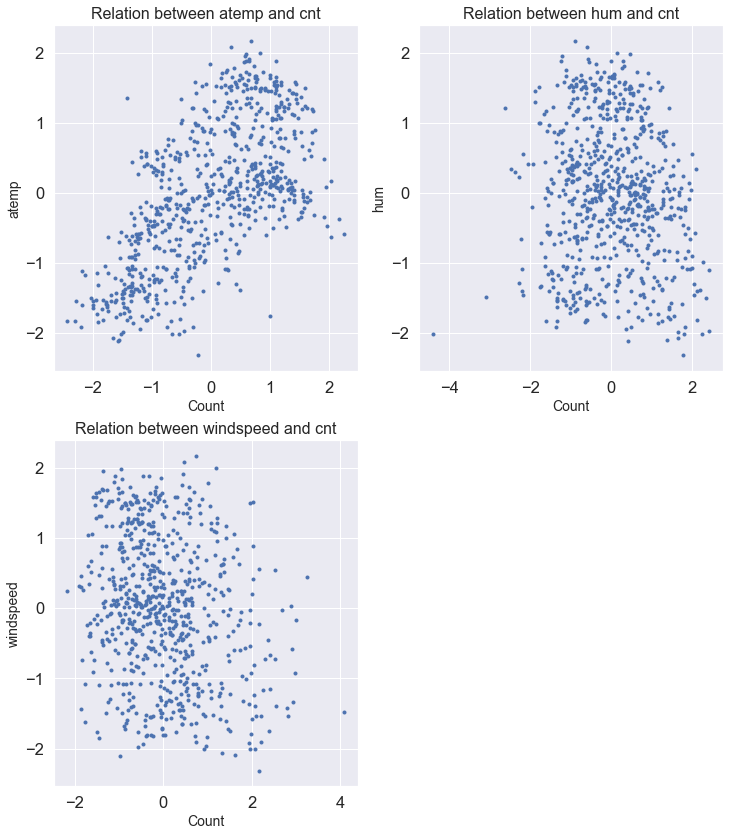

In [38]:
featuresgraph(colnames, "Relation between %s and cnt")

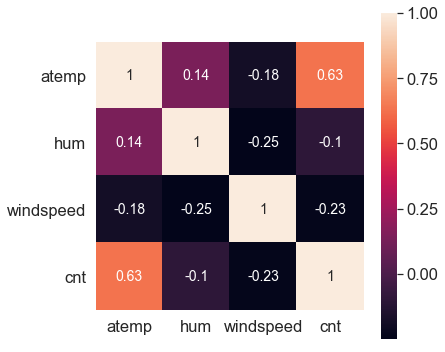

In [28]:
#Finding the correlation
fig = plt.subplots(figsize = (6,6))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 14})
plt.show()

In [29]:
#Normalizing the DataFrame
df = (df - df.mean())/df.std()
df.head()

,atemp,hum,windspeed,cnt
0,-0.679481,1.249316,-0.387626,-1.816709
1,-0.740146,0.478785,0.749089,-1.911691
2,-1.748570,-1.338358,0.746121,-1.628810
3,-1.609168,-0.263001,-0.389562,-1.518858
4,-1.503941,-1.340576,-0.046275,-1.499242


In [30]:
#Constructing the X's array
X = df.iloc[:,0:3]
ones = np.ones([X.shape[0], 1])
X = np.concatenate((ones, X), axis=1)
#Constructing the y array
y = df.iloc[:,3:4].values
#Intial wieghts 'thetas'
theta = np.zeros([1,4])

In [31]:
#Defining the Cost Function
def CostFunction(X,y, theta):
    tosum = np.power(((X @ theta.T)-y),2)
    return np.sum(tosum)/(2*len(X))

In [32]:
#Defining the Gradient Descent Function
def gradientDescent(X,y,theta, iterations = 1000, alpha = 0.01):
    cost = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = CostFunction(X, y, theta)
    return theta, cost, iterations

In [33]:
new_theta , cost, iterations = gradientDescent(X,y,theta)
print(new_theta)

[[ 3.60423046e-16  6.31189942e-01 -2.32777095e-01 -1.76442334e-01]]


In [34]:
#The final and minimum value of Cost Function
FinalCost = CostFunction(X,y, new_theta)
print(FinalCost)

0.2680329652364477


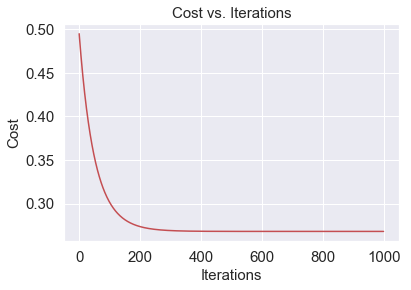

In [39]:
#Ploting the Cost Function Vs. the Number of Iterations
fig, ax = plt.subplots()
ax = plt.subplot( xlabel='Iterations', ylabel='Cost', title='Cost vs. Iterations')
ax.plot(np.arange(iterations), cost, 'r')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)


In [40]:
#Using the closed loop formulas for direct answers
theta_closed = np.matmul(np.matmul(slin.inv(np.matmul(X.T,X)), X.T),y)
theta_closed = theta_closed.T
theta_closed

array([[ 3.47378376e-16,  6.31255639e-01, -2.32882163e-01,
        -1.76488018e-01]])